In [11]:
import json
from pathlib import Path
from collections import Counter

print("✅ Import thành công!")

✅ Import thành công!


## 1. Load 2 datasets

In [12]:
# Đường dẫn files
vmlu_path = Path('../data/sft_dataset_vmlu/train_sft_vmlu.jsonl')
vnhsge_path = Path('../data/sft_dataset_vnhsge/train_sft.jsonl')

# Load VMLU dataset
vmlu_data = []
with open(vmlu_path, 'r', encoding='utf-8') as f:
    for line in f:
        vmlu_data.append(json.loads(line.strip()))

# Load VNHSGE dataset
vnhsge_data = []
with open(vnhsge_path, 'r', encoding='utf-8') as f:
    for line in f:
        vnhsge_data.append(json.loads(line.strip()))

print(f"📊 VMLU dataset: {len(vmlu_data)} samples")
print(f"📊 VNHSGE dataset: {len(vnhsge_data)} samples")
print(f"📊 TỔNG: {len(vmlu_data) + len(vnhsge_data)} samples")

📊 VMLU dataset: 1003 samples
📊 VNHSGE dataset: 1573 samples
📊 TỔNG: 2576 samples


## 2. Kiểm tra format

In [13]:
print("🔍 Sample từ VMLU:")
print(json.dumps(vmlu_data[0], ensure_ascii=False, indent=2))

print("\n" + "="*80 + "\n")

print("🔍 Sample từ VNHSGE:")
print(json.dumps(vnhsge_data[0], ensure_ascii=False, indent=2))

🔍 Sample từ VMLU:
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Câu hỏi: Khi nền kinh tế đang có lạm phát cao, nên:\nA. Giảm lượng cung tiền, tăng lãi suất\nB. Giảm chi ngân sách và tăng thuế\nC. Các lựa chọn đều sai\nD. Các lựa chọn đều đúng"
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"D\"}"
    }
  ]
}


🔍 Sample từ VNHSGE:
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Câu 81: Có thể sử dụng hóa chất nào sau đây để phát hiện quá trình hô hấp ở thực vật thải ra khí CO2? \nA. Dung dịch NaCl. \nB. Dung dịch Ca(OH)2. \nC. Dung dịch KCl. \nD. Dung dịch H2SO4."
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"B\"}"
    

## 3. Phân tích subject distribution

In [14]:
# Đếm subjects trong VMLU
vmlu_subjects = Counter([item.get('subject', 'Unknown') for item in vmlu_data])
print("📊 VMLU - Subject distribution:")
for subject, count in sorted(vmlu_subjects.items()):
    print(f"  {subject}: {count} samples ({count/len(vmlu_data)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# Đếm subjects trong VNHSGE
vnhsge_subjects = Counter([item.get('subject', 'Unknown') for item in vnhsge_data])
print("📊 VNHSGE - Subject distribution:")
for subject, count in sorted(vnhsge_subjects.items()):
    print(f"  {subject}: {count} samples ({count/len(vnhsge_data)*100:.1f}%)")

print("\n" + "="*80 + "\n")

# Combined
all_subjects = vmlu_subjects + vnhsge_subjects
print("📊 COMBINED - Subject distribution:")
total_samples = len(vmlu_data) + len(vnhsge_data)
for subject, count in sorted(all_subjects.items()):
    print(f"  {subject}: {count} samples ({count/total_samples*100:.1f}%)")

📊 VMLU - Subject distribution:
  Unknown: 1003 samples (100.0%)


📊 VNHSGE - Subject distribution:
  Biology: 190 samples (12.1%)
  Chemistry: 196 samples (12.5%)
  CivicEducation: 200 samples (12.7%)
  English: 250 samples (15.9%)
  Geography: 190 samples (12.1%)
  History: 200 samples (12.7%)
  Mathematics: 180 samples (11.4%)
  Physics: 167 samples (10.6%)


📊 COMBINED - Subject distribution:
  Biology: 190 samples (7.4%)
  Chemistry: 196 samples (7.6%)
  CivicEducation: 200 samples (7.8%)
  English: 250 samples (9.7%)
  Geography: 190 samples (7.4%)
  History: 200 samples (7.8%)
  Mathematics: 180 samples (7.0%)
  Physics: 167 samples (6.5%)
  Unknown: 1003 samples (38.9%)


## 4. Merge datasets

In [15]:
# Kết hợp 2 datasets
merged_data = vmlu_data + vnhsge_data

print(f"✅ Đã merge thành công!")
print(f"📊 Tổng số samples: {len(merged_data)}")
print(f"   - VMLU: {len(vmlu_data)} samples")
print(f"   - VNHSGE: {len(vnhsge_data)} samples")

✅ Đã merge thành công!
📊 Tổng số samples: 2576
   - VMLU: 1003 samples
   - VNHSGE: 1573 samples


## 4.1. Phân tích phân bố đáp án

📊 VMLU - Phân bố đáp án đúng:
  A:  240 câu ( 23.9%)
  B:  248 câu ( 24.7%)
  C:  267 câu ( 26.6%)
  D:  248 câu ( 24.7%)


📊 VNHSGE - Phân bố đáp án đúng:
  A:  471 câu ( 29.9%)
  B:  389 câu ( 24.7%)
  C:  373 câu ( 23.7%)
  D:  340 câu ( 21.6%)


📊 MERGED - Phân bố đáp án đúng:
  A:  711 câu ( 27.6%)
  B:  637 câu ( 24.7%)
  C:  640 câu ( 24.8%)
  D:  588 câu ( 22.8%)


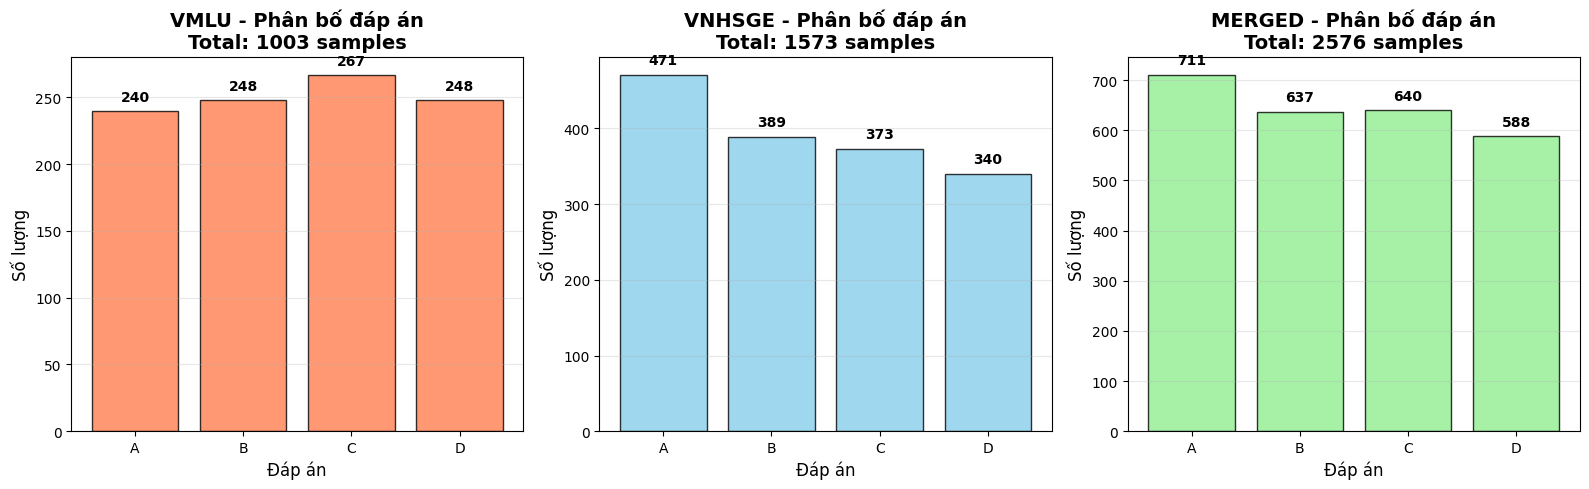


⚖️ Kiểm tra độ balanced:
VMLU - Độ lệch chuẩn: 9.93
VNHSGE - Độ lệch chuẩn: 48.24
MERGED - Độ lệch chuẩn: 43.85

💡 Độ lệch chuẩn càng nhỏ thì dataset càng balanced


In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Hàm trích xuất đáp án từ assistant message
def extract_answer(item):
    """Trích xuất đáp án từ assistant message"""
    for msg in item.get('messages', []):
        if msg.get('role') == 'assistant':
            content = msg.get('content', '')
            # Parse JSON để lấy answer
            try:
                answer_dict = json.loads(content)
                return answer_dict.get('answer', None)
            except:
                return None
    return None

# Đếm phân bố đáp án
vmlu_answers = [extract_answer(item) for item in vmlu_data]
vmlu_answers = [a for a in vmlu_answers if a is not None]
vmlu_answer_counts = Counter(vmlu_answers)

vnhsge_answers = [extract_answer(item) for item in vnhsge_data]
vnhsge_answers = [a for a in vnhsge_answers if a is not None]
vnhsge_answer_counts = Counter(vnhsge_answers)

merged_answers = vmlu_answers + vnhsge_answers
merged_answer_counts = Counter(merged_answers)

# In thống kê
print("📊 VMLU - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = vmlu_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(vmlu_answers)*100:5.1f}%)")

print("\n" + "="*80 + "\n")

print("📊 VNHSGE - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = vnhsge_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(vnhsge_answers)*100:5.1f}%)")

print("\n" + "="*80 + "\n")

print("📊 MERGED - Phân bố đáp án đúng:")
for answer in ['A', 'B', 'C', 'D']:
    count = merged_answer_counts.get(answer, 0)
    print(f"  {answer}: {count:4d} câu ({count/len(merged_answers)*100:5.1f}%)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

answers = ['A', 'B', 'C', 'D']

# VMLU
vmlu_counts = [vmlu_answer_counts.get(a, 0) for a in answers]
axes[0].bar(answers, vmlu_counts, color='coral', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Đáp án', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].set_title(f'VMLU - Phân bố đáp án\nTotal: {len(vmlu_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(vmlu_counts):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# VNHSGE
vnhsge_counts = [vnhsge_answer_counts.get(a, 0) for a in answers]
axes[1].bar(answers, vnhsge_counts, color='skyblue', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('Đáp án', fontsize=12)
axes[1].set_ylabel('Số lượng', fontsize=12)
axes[1].set_title(f'VNHSGE - Phân bố đáp án\nTotal: {len(vnhsge_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')
for i, v in enumerate(vnhsge_counts):
    axes[1].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Merged
merged_counts = [merged_answer_counts.get(a, 0) for a in answers]
axes[2].bar(answers, merged_counts, color='lightgreen', alpha=0.8, edgecolor='black')
axes[2].set_xlabel('Đáp án', fontsize=12)
axes[2].set_ylabel('Số lượng', fontsize=12)
axes[2].set_title(f'MERGED - Phân bố đáp án\nTotal: {len(merged_answers)} samples', 
                  fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')
for i, v in enumerate(merged_counts):
    axes[2].text(i, v + 15, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Kiểm tra balance
print(f"\n⚖️ Kiểm tra độ balanced:")
print(f"VMLU - Độ lệch chuẩn: {np.std(vmlu_counts):.2f}")
print(f"VNHSGE - Độ lệch chuẩn: {np.std(vnhsge_counts):.2f}")
print(f"MERGED - Độ lệch chuẩn: {np.std(merged_counts):.2f}")
print(f"\n💡 Độ lệch chuẩn càng nhỏ thì dataset càng balanced")

## 5. (Optional) Shuffle dataset

In [17]:
import random

# Tùy chọn: Shuffle để trộn đều 2 datasets
# Uncomment dòng dưới nếu muốn shuffle
# random.seed(42)
# random.shuffle(merged_data)

print("ℹ️ Dataset giữ nguyên thứ tự (VMLU trước, VNHSGE sau)")
print("💡 Uncomment dòng random.shuffle() nếu muốn trộn ngẫu nhiên")

ℹ️ Dataset giữ nguyên thứ tự (VMLU trước, VNHSGE sau)
💡 Uncomment dòng random.shuffle() nếu muốn trộn ngẫu nhiên


## 6. Kiểm tra duplicate IDs

In [18]:
# Kiểm tra có ID trùng không
all_ids = [item['id'] for item in merged_data if 'id' in item]
unique_ids = set(all_ids)

print(f"📊 Tổng số IDs: {len(all_ids)}")
print(f"📊 Số IDs unique: {len(unique_ids)}")

if len(all_ids) != len(unique_ids):
    duplicates = [id for id in all_ids if all_ids.count(id) > 1]
    print(f"⚠️ Có {len(set(duplicates))} IDs bị trùng!")
    print(f"   Ví dụ: {list(set(duplicates))[:5]}")
else:
    print("✅ Không có IDs trùng lặp!")

📊 Tổng số IDs: 1573
📊 Số IDs unique: 1573
✅ Không có IDs trùng lặp!


## 7. Save merged dataset

In [19]:
# Lưu file merged
output_path = Path('../data/train_sft_final.jsonl')

with open(output_path, 'w', encoding='utf-8') as f:
    for item in merged_data:
        f.write(json.dumps(item, ensure_ascii=False) + '\n')

print(f"✅ Đã lưu file merged vào: {output_path}")
print(f"📊 Tổng số samples: {len(merged_data)}")
print(f"📦 Kích thước file: {output_path.stat().st_size / (1024*1024):.2f} MB")

✅ Đã lưu file merged vào: ..\data\train_sft_final.jsonl
📊 Tổng số samples: 2576
📦 Kích thước file: 1.62 MB


## 8. Verify merged file

In [20]:
# Đọc lại file để verify
verify_data = []
with open(output_path, 'r', encoding='utf-8') as f:
    for line in f:
        verify_data.append(json.loads(line.strip()))

print(f"✅ Verify thành công!")
print(f"📊 Số samples trong file: {len(verify_data)}")
print(f"📊 Khớp với merged_data: {len(verify_data) == len(merged_data)}")

# Hiển thị một vài samples từ file merged
print("\n🔍 Sample đầu tiên (từ VMLU):")
print(json.dumps(verify_data[0], ensure_ascii=False, indent=2))

print(f"\n🔍 Sample từ giữa (index {len(vmlu_data)}):")
print(json.dumps(verify_data[len(vmlu_data)], ensure_ascii=False, indent=2))

✅ Verify thành công!
📊 Số samples trong file: 2576
📊 Khớp với merged_data: True

🔍 Sample đầu tiên (từ VMLU):
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Câu hỏi: Khi nền kinh tế đang có lạm phát cao, nên:\nA. Giảm lượng cung tiền, tăng lãi suất\nB. Giảm chi ngân sách và tăng thuế\nC. Các lựa chọn đều sai\nD. Các lựa chọn đều đúng"
    },
    {
      "role": "assistant",
      "content": "{\"answer\":\"D\"}"
    }
  ]
}

🔍 Sample từ giữa (index 1003):
{
  "messages": [
    {
      "role": "system",
      "content": "Bạn là trợ lý trả lời trắc nghiệm. Chỉ trả JSON duy nhất: {\"answer\":\"A\"} hoặc B/C/D."
    },
    {
      "role": "user",
      "content": "Câu 81: Có thể sử dụng hóa chất nào sau đây để phát hiện quá trình hô hấp ở thực vật thải ra khí CO2? \nA. Dung dịch NaCl. \nB. Dung dịch Ca(OH)2. \nC. Dung dịch KCl. \nD

## 📋 Tổng kết

### Kết quả:
- ✅ Đã merge 2 datasets thành công
- ✅ File output: `data/train_sft_final.jsonl`
- ✅ Không có IDs trùng lặp
- ✅ Đã verify file output

### Bước tiếp theo:
1. 🔄 Sử dụng file `train_sft_final.jsonl` để training
2. 🎯 Có thể apply thêm data augmentation trên file này
3. 🤔 Có thể thêm reasoning hoặc custom system prompts

### Lưu ý:
- Dataset giữ nguyên thứ tự: VMLU trước, VNHSGE sau
- Nếu muốn shuffle, uncomment dòng `random.shuffle()` ở cell 5
- Cả 2 datasets đều đã được filter chỉ giữ câu hỏi có 4 đáp án